In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Systems of equations
I want to play around with hyperbolic systems of equations here using arbitrary velocities and velocity functions
1. Diffusion velocities and mass/mole averages. Include plots of absolute velocities and relative velocities
  * rework stokes law by hand
2. Make system of 2 eqns with forward and back flow

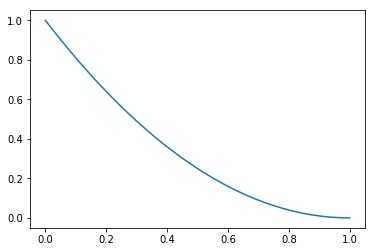

In [2]:
def get_c_all(α):
    α_total = np.sum(α,axis=0)
    return (1-α_total)**2
def get_c(α):
    return (1-α)**2
def get_q(α):
    return α*get_c(α)
α = np.linspace(0,1)
plt.plot(α,get_c(α))
plt.show()

def namestr(obj, namespace):
    '''gets variable name out of a given namespace'''
    return [name for name in namespace if namespace[name] is obj]


### Procedure for getting cell fluxes from hindered settling corrections
1. define number of cell types
2. initialize concentrations for cells  
3. combine into 1 data frame  
4. calculate relative speeds  
5. initialize plasma α and c and combine with cell arrays  
6. compute absolute velocities using Davis 1994 equation 2:  
$$c_{i}=c_{i}^{s}-\sum_{j=1}^{N}{c_{j}^{s}\alpha_{j}}$$  
where $c_{i}^{s}$ is the velocity of the cell relative to the plasma (Note that by definition, the slip velocity of plasma is 0), and $c_{i}$ is the absolute velocity. The quantity $j$ is the number of cell types in the suspension
7. compute absolute fluxes and see if they sum to 0:  
$$j_{i}=\alpha c_{i}$$

System flux function pseudocode
1. inputs: ixj array (checkdims) for cell concentrations
2. calls the velocity function.
3. returns flux AND velocity

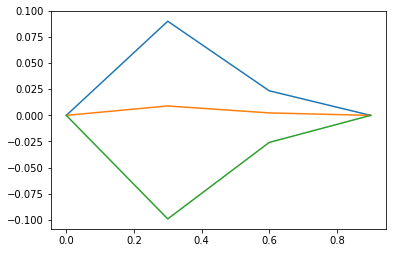

In [5]:
def get_q(α_cells,*u0):
    '''
    returns the speed and volumetric flux of j particle types
    inputs: jxn array (checkdims for consistency) of j particle concentrations.
    
    number of species and stokes velocity should come from class attributes
    output: 
    '''
    # assign slip velocity of cells relative to fluid using HSC
    c_cells_slip = get_c(np.sum(α_cells,axis=0)) # sum the particle concentrations. Replace with polydisperse HSC.
    c_cells_slip = np.vstack((c_cells_slip,c_cells_slip))
    
    
    # calculate plasma α, initialize array of plasma speeds (0), and combine with cell values
    α_plasma = 1-np.sum(α_cells,axis=0)
    c_plasma = np.zeros(ngrd)
    α,c_slip = [np.vstack((species,fluid)) for species,fluid in zip((α_cells,c_cells_slip),(α_plasma,c_plasma))]
    
    # compute absolute velocities (and flux) using Davis and Gecol 1994 equation 2
    c_avg_slip = np.sum(c_slip*α,axis=0)
    c_abs = c_slip - c_avg_slip
    q_abs = α*c_abs
    
    return q_abs,c_abs

q,c = get_q(α_cells)
plt.plot(α_cells[0,:].T,q.T)

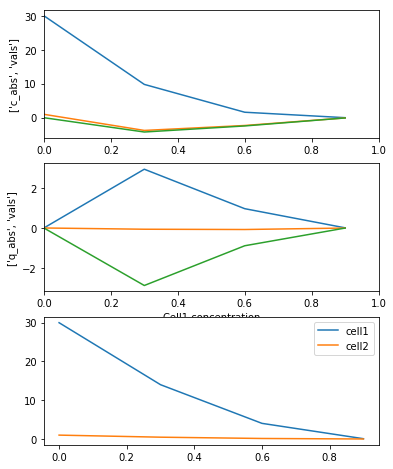

In [16]:
# variable containing species velocities
# calculate species velocity - I need to finish reading the diffusion velocity excerpts and look at stokes' law on paper.
nspecies = 3
ngrd = 4

# define initial concentration vectors for each species using linspace and start/end values.
# does not include plasma
α_cells = [np.linspace(start,end,ngrd) for start,end in zip((0,0),(0.9,0.05))]
α_cells = np.vstack(α_cells)

# compute slip velocity for each cell relative to plasma from hindered settling function
# Until I have a polydisperse HSC, I'll have to calculate the slip velocity as a sum of total concentration,
# and assign that speed to each species.
c_cells_slip = get_c(np.sum(α_cells,axis=0))
c_cells_slip = np.vstack((30*c_cells_slip,c_cells_slip))

# calculate plasma α and initialize an array of 0 speeds.
α_plasma = 1-np.sum(α_cells,axis=0)
c_plasma = np.zeros(ngrd) # np.empty gives different result than np.zeros()

# combine the α, flux, and speed arrays for cells and plasma
α,c_slip = [np.vstack((species,fluid)) for species, fluid in zip((α_cells,c_cells_slip),(α_plasma,c_plasma))]

# compute absolute velocities (and flux) using Davis and Gecol 1994 equation 2
c_avg_slip = np.sum(c_slip*α,axis=0)
c_abs = c_slip - c_avg_slip
q_abs = α*c_abs

fig,axs = plt.subplots(3,figsize=(6,8))
for i,vals in enumerate((c_abs,q_abs)):
    axs[i].plot(α[0,:],vals.T)
    axs[i].set_ylabel(namestr(vals,globals()))
    axs[i].set_xlim([0,1])
    
axs[2].plot(α[0,:],c_cells_slip.T)
axs[1].set_xlabel('Cell1 concentration')
plt.legend(['cell1','cell2','plasma'])
plt.show()

In [17]:
q_abs[1,:]

array([ 0.        , -0.06238897, -0.07633457, -0.00325625])

In [ ]:
α.round(decimals=3)

In [ ]:
c_avg_slip.round(decimals=3)

In [ ]:
c_slip.round(decimals=3)

In [ ]:
c_abs.round(decimals=3)

In [ ]:
q_abs.round(decimals=3)

In [ ]:
np.sum(q_abs,axis=0).round(decimals=3)